In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.models import load_model

print(f'Tensorflow version: {tf.__version__}')


Tensorflow version: 2.9.1


In [4]:
main_dir = "C:/Users/Vinicius/Desktop/DATA SCIENCE/BOOTCAMP/Projeto - IoT/cargas_eletricas"
df_original = pd.read_csv(f"{main_dir}/data/processed/pca_15.csv", index_col=[0])
df = df_original.copy()
df

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,Classes
0,0.804739,9.932256,-2.952120,1.727607,1.139999,1.220739,-3.010333,6.213570,-0.245333,-4.947468,3.224966,-0.333513,1.028451,-1.138487,-0.724202,1
1,16.187274,-0.789747,-4.951606,4.676206,0.482721,4.361189,-1.154607,-0.333671,-0.566406,0.654430,-2.366882,-1.191813,-2.809570,1.463848,-0.549039,1
2,4.970044,-1.496823,-6.723726,1.026952,-0.778361,-1.203140,-2.323602,1.599791,-1.668225,-1.622038,3.157523,0.739755,-0.118455,-1.120964,3.245290,1
3,2.460069,-2.860497,-5.417960,0.436978,-0.153589,-1.637444,-2.642204,3.179805,-0.552393,-2.282255,2.672498,0.495897,0.048147,-0.114480,0.224475,1
4,-4.168125,-5.182046,-1.309993,-1.370185,0.030386,0.221138,1.950496,0.416317,1.254989,-2.496386,0.705462,-1.148448,-0.652334,0.492994,-1.778258,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.147604,-4.117617,-0.477593,-1.120898,-0.850432,0.728094,-0.516973,-1.074211,-0.009713,0.359087,-0.867715,0.493532,-0.515811,0.491301,-0.320257,5
96,-6.106749,5.479102,2.056551,-0.721723,-1.440073,0.811643,0.444532,-0.957423,-0.112422,-1.579596,-0.670466,-0.316001,-0.048992,-0.485471,0.126146,6
97,-5.078876,0.747347,1.076584,-0.683721,-0.806197,-0.131654,1.458761,-0.715981,-0.807390,-2.602165,-1.113317,0.742115,-1.413547,0.724775,-1.939868,6
98,-4.547102,-13.501987,-1.218863,-1.386661,-1.644493,-4.081425,-2.921893,-1.743130,-0.530214,2.492557,-0.590194,0.727877,0.415277,1.097116,-0.958785,7


In [16]:
pd.get_dummies(df['Classes'], prefix='class')

,class_1,class_2,class_3,class_4,class_5,class_6,class_7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
95,0,0,0,0,1,0,0
96,0,0,0,0,0,1,0
97,0,0,0,0,0,1,0
98,0,0,0,0,0,0,1


In [17]:
X = df.drop('Classes', axis=1)
Y = pd.get_dummies(df['Classes'], prefix='class')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [18]:
n_features = X.shape[1]
n_features

15

In [21]:
n_classes = Y.shape[1]
n_classes

7

In [24]:
n_mean = int(np.array([n_features,n_classes]).mean())
n_mean

11

In [25]:
model = Sequential()
model.add(Dense(n_features, activation='tanh', input_shape=(n_features,)))
model.add(Dense(n_mean, activation='tanh'))
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 11)                176       
                                                                 
 dense_4 (Dense)             (None, 7)                 84        
                                                                 
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test), verbose=1)

Epoch 1/300
3/3 [==============================] - 4s 244ms/step - loss: 2.0751 - accuracy: 0.0714 - val_loss: 2.0515 - val_accuracy: 0.1000
Epoch 2/300
3/3 [==============================] - 0s 28ms/step - loss: 2.0352 - accuracy: 0.0714 - val_loss: 2.0180 - val_accuracy: 0.1000
Epoch 3/300
3/3 [==============================] - 0s 47ms/step - loss: 2.0027 - accuracy: 0.0571 - val_loss: 1.9860 - val_accuracy: 0.0667
Epoch 4/300
3/3 [==============================] - 0s 42ms/step - loss: 1.9698 - accuracy: 0.0571 - val_loss: 1.9551 - val_accuracy: 0.0667
Epoch 5/300
3/3 [==============================] - 0s 42ms/step - loss: 1.9394 - accuracy: 0.0571 - val_loss: 1.9245 - val_accuracy: 0.0667
Epoch 6/300
3/3 [==============================] - 0s 50ms/step - loss: 1.9098 - accuracy: 0.0571 - val_loss: 1.8947 - val_accuracy: 0.1333
Epoch 7/300
3/3 [==============================] - 0s 46ms/step - loss: 1.8809 - accuracy: 0.0857 - val_loss: 1.8667 - val_accuracy: 0.1333
Epoch 8/300
3/3 [==

In [27]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_loss)
print('Train acc:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test acc:', test_acc)
losses = pd.DataFrame(hist.history)
losses

Train loss: 0.15671736001968384
Train acc: 0.9857142567634583
Test loss: 0.22704502940177917
Test acc: 0.9666666388511658


,loss,accuracy,val_loss,val_accuracy
0,2.075144,0.071429,2.051491,0.100000
1,2.035217,0.071429,2.017986,0.100000
2,2.002669,0.057143,1.986025,0.066667
3,1.969779,0.057143,1.955114,0.066667
4,1.939438,0.057143,1.924502,0.066667
...,...,...,...,...
295,0.162527,0.985714,0.230792,0.966667
296,0.161152,0.985714,0.229945,0.966667
297,0.159954,0.985714,0.228935,0.966667
298,0.158773,0.985714,0.227957,0.966667


### Saving

In [29]:
# model.save('NN15_test1.h5')

### Plotting Results

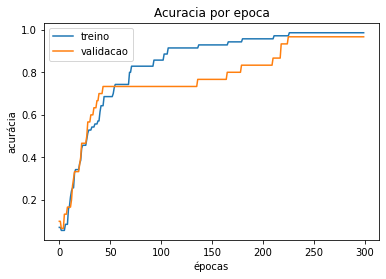

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acuracia por epoca')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])
plt.show()

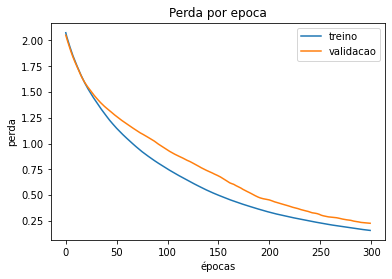

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perda por epoca')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])
plt.show()